<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/PCVK_2024_19/blob/main/Week10_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**

https://github.com/MuhammadAinurRiziq13/PCVK_2024_19

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Global Threshold tanpa menggunakan Library

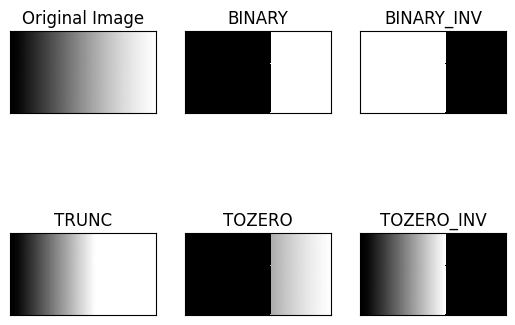

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
filename = '/content/drive/MyDrive/pcvk/gradient.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Initialize threshold value
thresh = 170

# 1. Binary threshold
thresh1 = np.zeros_like(img)
thresh1[img > thresh] = 255  # Set pixels greater than threshold to white (255)
thresh1[img <= thresh] = 0   # Set pixels less than or equal to threshold to black (0)

# 2. Binary threshold inverse
thresh2 = np.zeros_like(img)
thresh2[img > thresh] = 0    # Set pixels greater than threshold to black (0)
thresh2[img <= thresh] = 255 # Set pixels less than or equal to threshold to white (255)

# 3. Truncate threshold
thresh3 = img.copy()
thresh3[img > thresh] = thresh  # Cap pixels above the threshold to the threshold value

# 4. Tozero threshold
thresh4 = np.zeros_like(img)
thresh4[img > thresh] = img[img > thresh]  # Keep original pixel values if greater than threshold
thresh4[img <= thresh] = 0                 # Set pixels less than or equal to threshold to black (0)

# 5. Tozero inverse threshold
thresh5 = np.zeros_like(img)
thresh5[img <= thresh] = img[img <= thresh] # Keep original pixel values if less than or equal to threshold
thresh5[img > thresh] = 0                   # Set pixels greater than threshold to black (0)

# Plotting the images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### Otsu Thresholding tanpa menggunakan Library

167


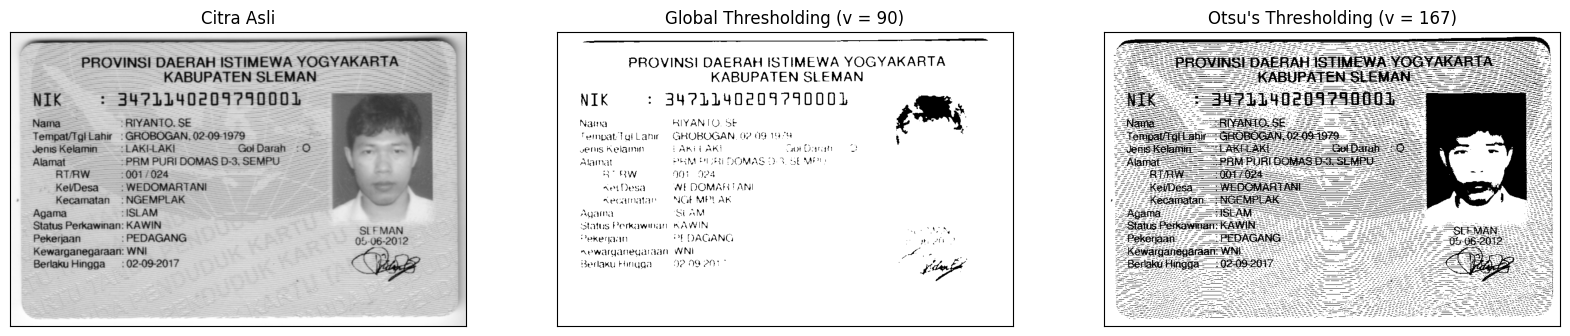

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/pcvk/ktp Riyanto.png'
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in bins[1:-1]:  # Iterate through thresholds from 1 to 254
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])

        # Prevent division by zero
        if pcb == 0 or pcf == 0:
            continue

        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)

        # Calculate inter-class variance
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print(final_thresh)  # Print Otsu's threshold value
    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0

    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

###histogram dari citra tersegmentasi

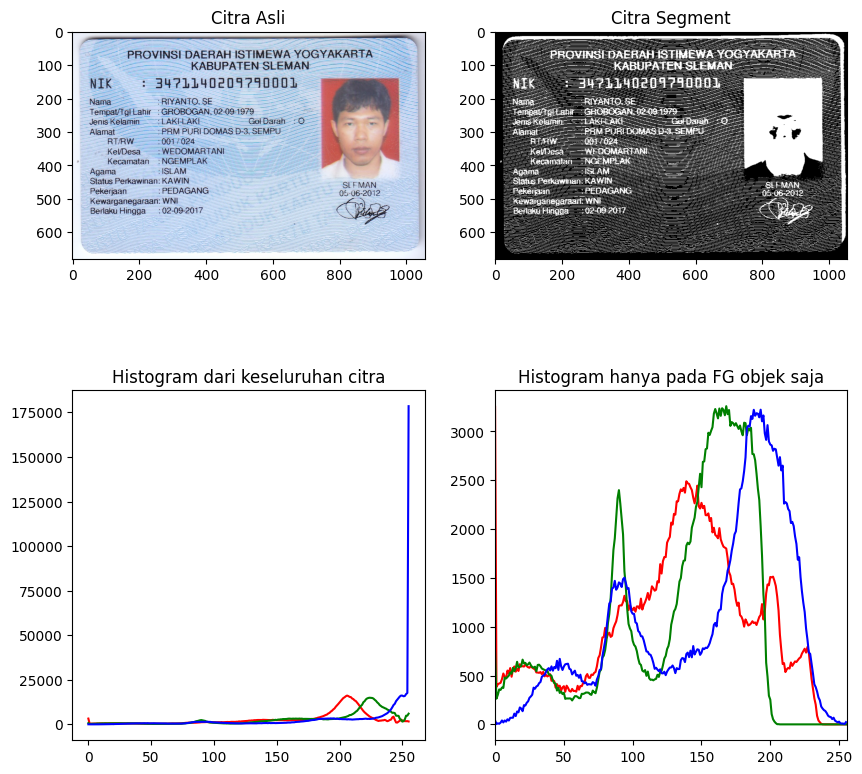

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/pcvk/ktp Riyanto.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply binary inverse thresholding
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Display original image and mask
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')

# Plot histograms
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    # Histogram for the entire image
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')

    # Histogram for the segmented area (foreground only)
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')

plt.xlim([0, 256])
plt.show()

### Segmentasi hanya warna yang biru saja.

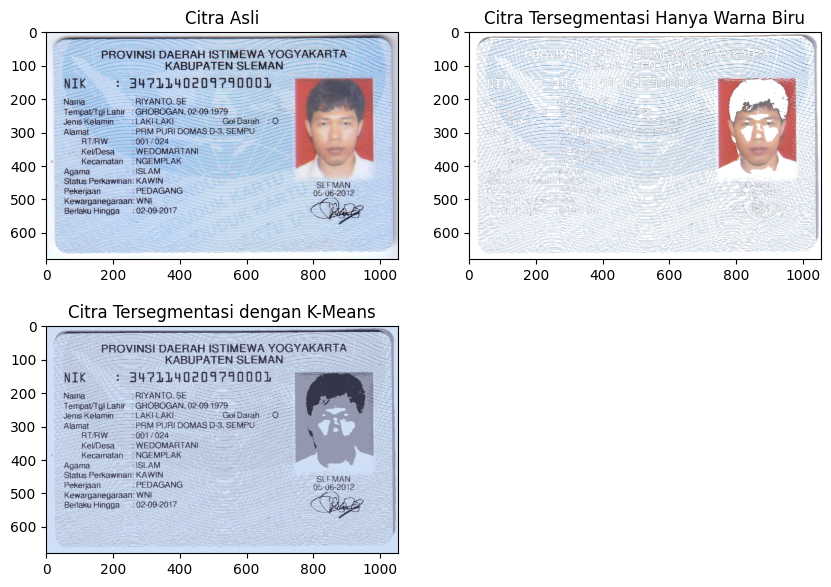

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/pcvk/ktp Riyanto.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ubah citra menjadi array 2D (reshape) dan konversi ke float32
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Kriteria untuk KMeans (berhenti jika iterasi mencapai 150 atau epsilon < 0.1)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

# Jumlah cluster (k) - berdasarkan warna utama yang diamati di citra
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi nilai centroid ke integer
centers = np.uint8(centers)

# Flatten array label
labels = labels.flatten()

# Mapping nilai pixel ke warna centroid masing-masing
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

# Buat citra tersegmentasi hanya untuk warna biru
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]  # Ubah cluster non-biru menjadi putih
masked_image0 = masked_image0.reshape(img.shape)

# Tampilkan hasil
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(masked_image0)
plt.title('Citra Tersegmentasi Hanya Warna Biru')
plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Citra Tersegmentasi dengan K-Means')

plt.show()

### konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 3s (1,931 kB/s)
debconf: unable to ini

Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()

In [3]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dengan matplotlib
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.show()

 Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [18]:
# Membaca gambar
image_path = '/content/drive/MyDrive/pcvk/ktp Riyanto.png'
img = cv2.imread(image_path)

# Preprocessing gambar untuk meningkatkan akurasi OCR
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menggunakan Tesseract OCR
custom_config = r'--oem 3 --psm 6'  # Optimal untuk teks multi-line
d = pytesseract.image_to_data(thresh, output_type=Output.DICT)

# Menampilkan keys dari hasil OCR (hanya untuk debugging)
print("Keys dalam output OCR:", d.keys())

Keys dalam output OCR: dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


 Menambahkan kotak untuk deteksi teksi pada gambar

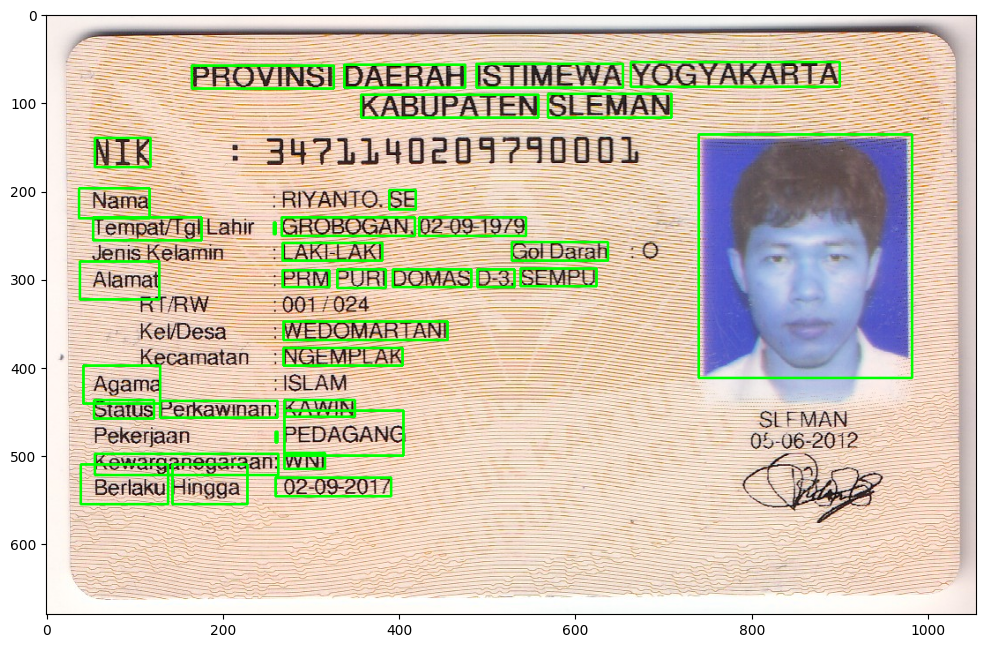

In [19]:
# Menambahkan kotak untuk deteksi teks pada gambar
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:  # Hanya menampilkan teks dengan confidence lebih dari 60
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Menampilkan gambar dengan bounding box
display(img)

 Hasil pembacaan KTP Menjadi text

In [8]:
# Mengekstraksi dan mencetak teks yang dikenali
extracted_text = pytesseract.image_to_string(thresh, config=custom_config)
print("Hasil teks yang terdeteksi:")
print(extracted_text)

Hasil teks yang terdeteksi:
——————————
PROVINS! DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN 7
NIK  : 3471240209790001
Nama /RIYANTO. SE
Tempat/TgtLahir : GROBOGAN, 02-09-1979
Jens Kelamin :LAKILLAKI GolDarah :O ~~ oo.
Alamat : PRM PURI DOMAS D-3, SEMPU.
RTRW 2001 /024
KevDesa  : WEDOMARTANI oC
Kecamatan :NGEMPLAK '
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye
Kewarganegaraan: WNI >
Berlaku Hingga 02-09-2017 Ree



### Tugas
Mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP.

Hasil Citra dengan Bounding Box:


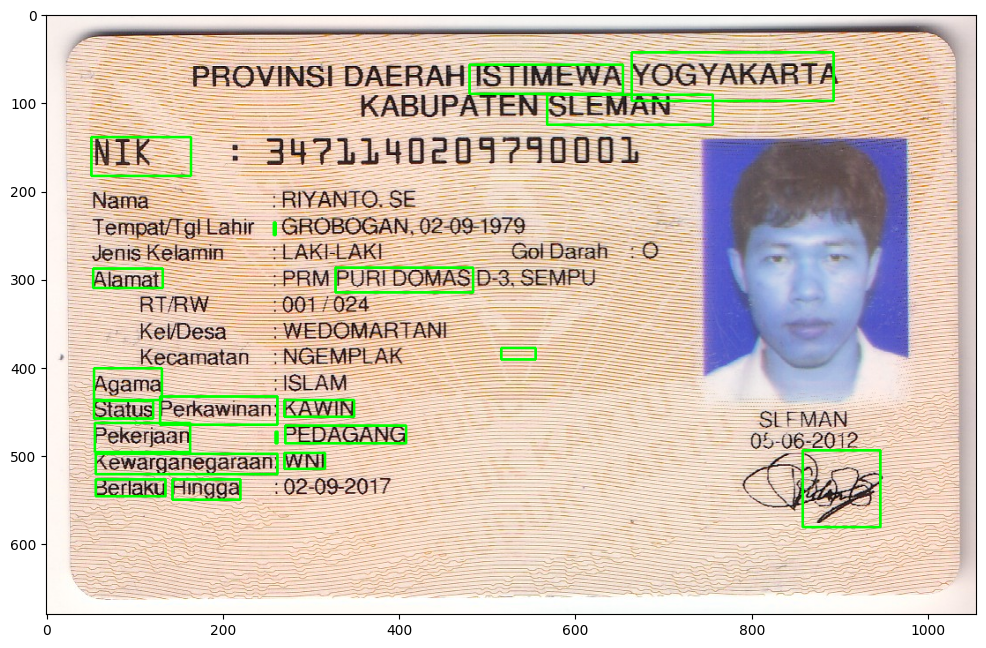

In [23]:
# Impor library yang diperlukan
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.show()

# Membaca gambar
image_path = '/content/drive/MyDrive/pcvk/ktp Riyanto.png'
img = cv2.imread(image_path)

# Preprocessing gambar dengan Global Thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)  # Global thresholding dengan nilai 127

# Menggunakan Tesseract OCR untuk membaca teks dari gambar hasil thresholding
custom_config = r'--oem 3 --psm 6'  # Optimal untuk teks multi-line dan bahasa Indonesia
d = pytesseract.image_to_data(thresh, config=custom_config, output_type=Output.DICT)

# Menambahkan bounding box di sekitar teks yang terdeteksi
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:  # Tampilkan hanya teks dengan confidence > 60
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Menampilkan gambar dengan bounding box
print("Hasil Citra dengan Bounding Box:")
display(img)

In [24]:
# Mengekstraksi teks dan mencetak hasilnya
extracted_text = pytesseract.image_to_string(thresh, config=custom_config)
print("Hasil teks yang terdeteksi:")
print(extracted_text)

Hasil teks yang terdeteksi:
=> PROVINSI DAERAH ISTIMEWA YOGYAKARTA #22

2 lL. 72 KABUPATEN SLEMAN = = coc

NIK= '-3471140209790001 — gee

Tempatiighkahir : GROBOGAN.02.09-1979 =. o5_. P i

_Jenis:Kelamin. =~. .AKELARKT = Geibarate 0" SY. OE

Alamat 222“ ===PRM PURTDOMAS D-3:SEMPU: fo. P4
RTRWe 2 O01 O24 a Boe
KeVDesa~=2WEDOMARTAND ~~ eo =
Kecamatanh -NGEMPLAKi sso. =" Seer *

Agama TISLAM “Sei ces ae ES

Status Perkawinan: KAWIN Lote cee .

Pekerjaan : PEDAGANG . - Coe ee

Kewarganegaraan: WNI. . °

Berlaku Hingga 02-09-2017 . ge

